## Exemplo básico de classificador

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns 

%matplotlib inline

In [2]:
# Carrega os dados
df_wine = pd.read_csv('dados/winequality-red.csv', delimiter=';')

# Exibe o cabeçalho e os primeiros registros
df_wine.head(10)

,Acidez fixa,Acidez volátil,Ácido cítrico,Açúcar residual,Cloretos,Dióxido de enxofre livre,Dióxido de enxofre total,Densidade,pH,Sulfatos,Álcool,Qualidade
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5



Total de vinhos:  1599


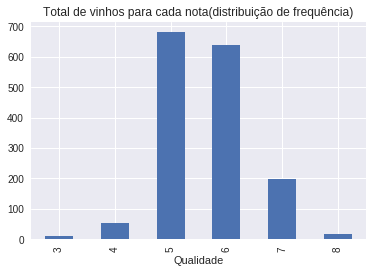

In [3]:
# Obtém o total de vinhos para cada nota
s_wine = df_wine.groupby('Qualidade').count()['Álcool']

print('\nTotal de vinhos: ', df_wine.shape[0])

# Exibindo gráfico
s_wine.plot(kind='bar', title='Total de vinhos para cada nota(distribuição de frequência)')

## Matriz de correlação

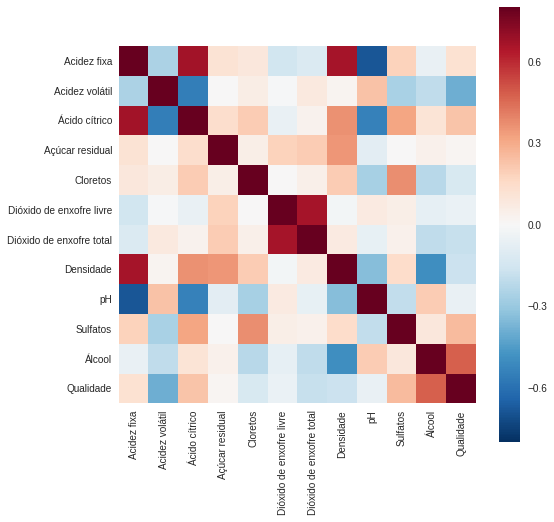

In [4]:
corr_mat = df_wine.corr()
f, ax = plt.subplots(figsize=(8, 8))
sns.heatmap(corr_mat, vmax=.8, square=True)

## Variação dos parâmetros químicos dos vinhos em relação à qualidade

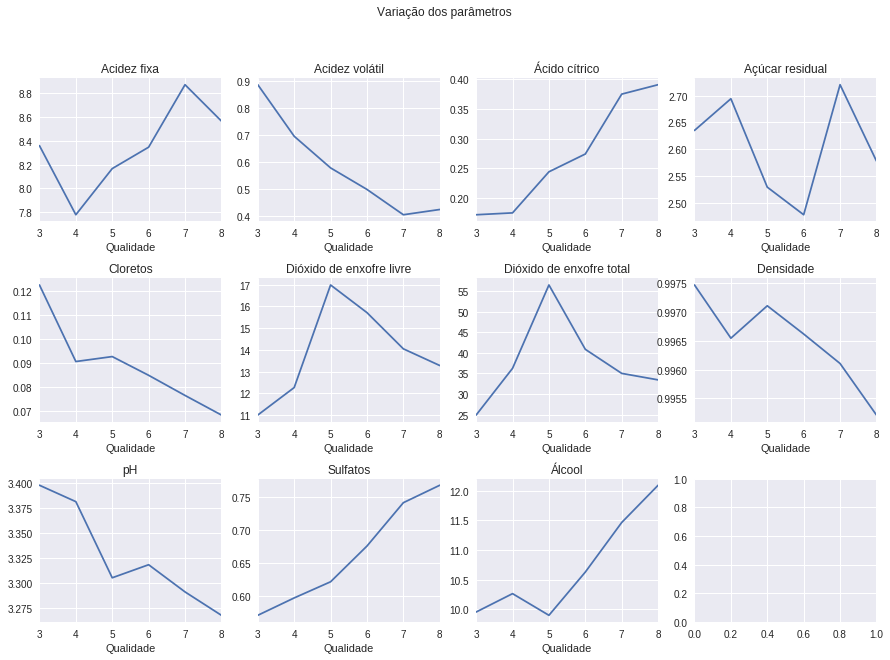

In [5]:
df = df_wine.groupby('Qualidade').mean()

# Definindo gráficos
fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(15, 10))
fig.suptitle("Variação dos parâmetros")

# Aumentando espaço entre gráficos
fig.subplots_adjust(hspace=0.4)

# Plota gráfico com média dos elementos, agrupado pela nota
for i, column in enumerate(df.columns):
    ax = axes[int(i/4)][i % 4]
    
    ax.set_title(column)
    
    df[column].plot(ax=ax)

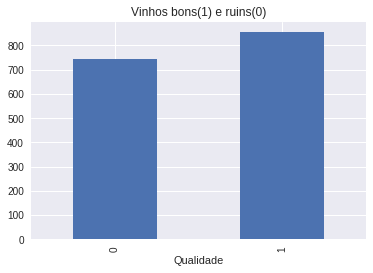

In [6]:
# Classifica as notas(3 a 5 = 0; 6 a 8 = 1)
df_wine['Qualidade'] = df_wine['Qualidade'].apply(lambda x: 0 if x < 6 else 1)

# Exibe gráfico
df_wine.groupby('Qualidade').count()['Álcool'].plot(kind='bar', title='Vinhos bons(1) e ruins(0)')

In [7]:
# Define os parâmetros para treinar o classificador
rotulos = ['Acidez fixa', 'Acidez volátil', 'Ácido cítrico', 'Açúcar residual',
       'Cloretos', 'Dióxido de enxofre livre', 'Dióxido de enxofre total',
       'Densidade', 'pH', 'Sulfatos', 'Álcool']

# Dados para treinamento
X = df_wine[rotulos]

# Saída esperada
y = df_wine['Qualidade']

# Divide os dados em conjunto de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# Cria a rede neural
classificador = MLPClassifier(
    hidden_layer_sizes=(10, 10, 10),
    random_state=1,
    activation='tanh',
    learning_rate='adaptive'
)

# Treina o classificador
classificador.fit(X_train, y_train)

# Classifica os dados de teste
preds = classificador.predict(X_test)

# Exibe taxa de acerto
print ('\nTaxa de acerto: ', accuracy_score(y_test, preds))

# Exibe total de acerto
print ('Total de acertos: {0} em {1}'.format( 
    accuracy_score(y_test, preds, normalize=False), y_test.count())
)


Taxa de acerto:  0.71875
Total de acertos: 230 em 320
